# Measurement
A qubit exists in a superposition of $\ket{0}$ and $\ket{1}$. However, upon measurement, we get a single, definite value. As a result, the measurement will yield either $\ket{0}$ or $\ket{1}$, each with a specific probability, rather than a superposition of $\ket{0}$ *and* $\ket{1}$.

In this demonstration, we will explore qubit measurement using IBM Quantum Composer and Qiskit.

1. [Calculating Measurement](#1.-Calculating-Measurement)
2. [IBM Quantum Composer](#2.-IBM-Quantum-Composer)  
3. [Qiskit Implementation](#3.-Qiskit-Implementation)  
4. [Example](#4.-Example)

IBM Quantum Composer: https://quantum.ibm.com/composer/

## 1. Calculating Measurement
Consider the application of the Hadamard gate to the state $\ket{0}$. The resulting superposition is $\frac{1}{\sqrt{2}}\left(\ket{0} + \ket{1}\right) = \frac{1}{\sqrt{2}}\ket{0} + \frac{1}{\sqrt{2}}\ket{1}$.

To get the exact probabilities of $\ket{0}$ and $\ket{1}$, we calculate the norm-square of each amplitude.

Probability of $\ket{0}$: $(\frac{1}{\sqrt{2}})^2 = \frac{1}{2}$

Probability of $\ket{1}$: $(\frac{1}{\sqrt{2}})^2 = \frac{1}{2}$

We can verify this by confirming that the sum of both probabilities is equal to $1$.

## 2. IBM Quantum Composer

### 2.1 Start with $\ket{0}$ state
#### (Note that initially the qubit already begins in the $\ket{0}$ state. We only apply this reset operation for visualization purposes)
<img src="measurement_images/start_state.png">
<img src="measurement_images/start_probability.png">

### 2.2 Use Hadamard Gate to generate $\frac{1}{\sqrt{2}}\left(\ket{0} + \ket{1}\right)$
<img src="measurement_images/hadamard.png">
<img src="measurement_images/hadamard_gate.png">

### 2.3 Apply Measurement 
<img src="measurement_images/measured_state.png">

### 2.4 Result
Now, we can set up and run the circuit on real quantum hardware. If you are not logged in, log in. Set up and run the circuit using the blue button in the top right. Choose the quantum computer you want to run on and keep the default number of shots. Run the circuit.

<img src="measurement_images/result.png">

## 3. Qiskit Implementation
### Imports

In [ ]:
%pip install qiskit
%pip install qiskit-aer

### 3.1 Constructing our Circuit

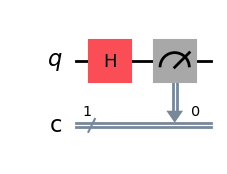

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1, 1)
qc.h(0)
measurement = qc.measure(0, 0)
qc.draw(output="mpl")

### 3.2 Measurement
To measure this circuit, Qiskit provides simulators to execute the circuits and obtain measurements. We can also call the backend of real quantum hardware such as <b>ibm_rensselaer</b> to execute our circuit. The number of shots specify how many copies of the circuit are created and run. This gives us a probability distribution over the possible states, $\ket{0}$ and $\ket{1}$.

In [2]:
from qiskit_aer import AerSimulator

simulator = AerSimulator()
job = simulator.run(qc, shots=1000) # How many copies of the circuit are executed

# Get the result and count the occurrences of each outcome
result = job.result()
counts = result.get_counts(qc)

print("Measurement results:", counts)

Measurement results: {'1': 487, '0': 513}


The results match our calculated measurements.

## 4. Example
We demonstrate a more complex example. Consider

$$
\ket{\psi} = \frac{2}{3}\ket{0} + \frac{1 + 2i}{3}\ket{1}
$$

If you measure the qubit, what is the probability of getting:

1. $\ket{0}$

2. $\ket{1}$

### 4.1 Calculating Measurement
Probability of $\ket{0}$: $(\frac{2}{3})^2 = \frac{4}{9}$

Probability of $\ket{1}$: $(\frac{1+2i}{3})^2 = (\frac{1+2i}{3})(\frac{1-2i}{3}) = \frac{1+4}{9} = \frac{5}{9}$

Verification: $\frac{4}{9} + \frac{5}{9} = 1$

### 4.2 IBM Quantum Composer
To construct $\ket{\psi}$ as a circuit, begin in $\ket{0}$. Then apply a $Ry$ gate with $\theta = \arccos(1.68213734)$ and a $Rz$ gate with $\phi = \arctan(1.1071)$. We will not dive into the calculation.

<img src="measurement_images/example.png">

Set up and run the circuit with default number of shots. Verify the results.

<img src="measurement_images/example_results.png">